In [1]:
import requests
import shutil
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pathlib import Path
from PIL import Image
from io import BytesIO
from dataclasses import dataclass
from typing import List, Optional, Any

In [2]:
for gpu in tf.config.experimental.list_physical_devices("GPU"):
    tf.config.experimental.set_virtual_device_configuration(
        gpu,
        [
            tf.config.experimental.VirtualDeviceConfiguration(
                memory_limit=1500
            )
        ]
    )

In [3]:
def load_model(name):
    path = Path("models", name)
    return tf.keras.models.load_model(path)

In [4]:
LABELS = ("Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck")

In [5]:
class ImageReader:
    def __init__(self, location, label, resize=(32, 32)):
        self.location = location
        self.label = label
        self.resize = resize
        self.img = self.image_to_numpy_array()
    
    def bytesio_to_numpy_array(self, bytes_io):
        i = Image.open(bytes_io)
        if self.resize:
            i = i.resize(self.resize, Image.ANTIALIAS)
        return np.array(i)
    
    def image_to_numpy_array():
        raise NotImplemented()
        
    def __call__(self):
        return np.expand_dims(self.img, axis=0).astype(float)


class ImageLocal(ImageReader):
    def image_to_numpy_array(self):
        b = Path(self.location).read_bytes()
        return self.bytesio_to_numpy_array(BytesIO(b))
    

class ImageUrl(ImageReader):
    def image_to_numpy_array(self):
        r = requests.get(self.location)
        return self.bytesio_to_numpy_array(BytesIO(r.content))

In [6]:
@dataclass
class Plotter:
    images: List[ImageReader]
    model: Any
    name: Optional[str] = None
        
    def __call__(self, per_row=3):
        per_col = len(self.images) // per_row + 1
        fig = self._init_plot()
    
        for i, img in enumerate(images, start=1):
            value, label = self._get_value_and_label(img)
            ax = fig.add_subplot(per_col, per_row, i)
            self._plot_ax(ax, img, value, label)
    
    def _init_plot(self):
        fig = plt.figure(figsize=(13, 13))
        if self.name:
            fig.suptitle(self.name, fontsize=20)
        return fig
            
    def _get_value_and_label(self, img):
        prediction = self.model.predict(img())[0]
        prediction_value = prediction[np.argmax(prediction)]
        prediction_label = LABELS[np.argmax(prediction)]
        return prediction_value, prediction_label

    def _plot_ax(self, ax, img, prediction_value, prediction_label):
        prediction_value_percent = round(prediction_value * 100)
        ax.axis("off")
        ax.set_title(f"Label : {img.label} | Predicted : {prediction_label} ({prediction_value_percent}%)")
        ax.imshow(img.img)

In [7]:
images = [
    ImageUrl("https://mfgtalkradio.com/wp-content/uploads/2016/02/GoogleTruck.jpg", "Truck"),
    ImageUrl("https://upload.wikimedia.org/wikipedia/commons/thumb/6/60/Neighbours_Siamese.jpg/640px-Neighbours_Siamese.jpg", "Cat"),
    ImageUrl("https://cdn.pixabay.com/photo/2016/01/20/13/05/cat-1151519__340.jpg", "Cat"),
    ImageUrl("https://static01.nyt.com/images/2019/04/02/science/28SCI-ZIMMER1/28SCI-ZIMMER1-articleLarge.jpg?quality=75&auto=webp&disable=upscale", "Frog"),
    ImageUrl("https://dw8stlw9qt0iz.cloudfront.net/FHKzfst9humx0GtrBeGw3IGA-Oo=/2000x2000/filters:format(jpeg):quality(75)/curiosity-data.s3.amazonaws.com/images/content/thumbnail/standard/27aee7af-a3dc-4c67-e57f-7648839ecd18.png", "Frog"),
    ImageUrl("https://nnimgt-a.akamaihd.net/transform/v1/crop/frm/silverstone-feed-data/5a018238-cb69-4c68-95b1-b74eb341596b.jpg/r0_0_800_600_w1200_h678_fmax.jpg", "Ship"),
    ImageUrl("https://i.insider.com/5cbf510dd1a2f8074406a8b4?width=1200&format=jpeg", "Ship"),
    ImageUrl("https://cdn.discordapp.com/attachments/304563607570743299/673608367285075994/IMG-20200202-WA0006.jpg", "Cat"),
    ImageUrl("https://media.discordapp.net/attachments/304563607570743299/670289331419611146/1577939252000.jpg", "Cat"),
    ImageUrl("https://cdn.discordapp.com/attachments/304563607570743299/670288907220549642/400.jpg", "Cat"),
    ImageUrl("https://media.discordapp.net/attachments/304563607570743299/670211690272522260/Screenshot_20200124-111528_9GAG.jpg", "Cat"),
    ImageUrl("https://cdn.discordapp.com/attachments/304563607570743299/669672714654711808/Her-for-the-good-times-not-long-time.jpg", "Cat"),
    ImageUrl("https://media.discordapp.net/attachments/304563607570743299/668584196226285588/20200112_132536.jpg?width=500&height=666", "Cat")
]

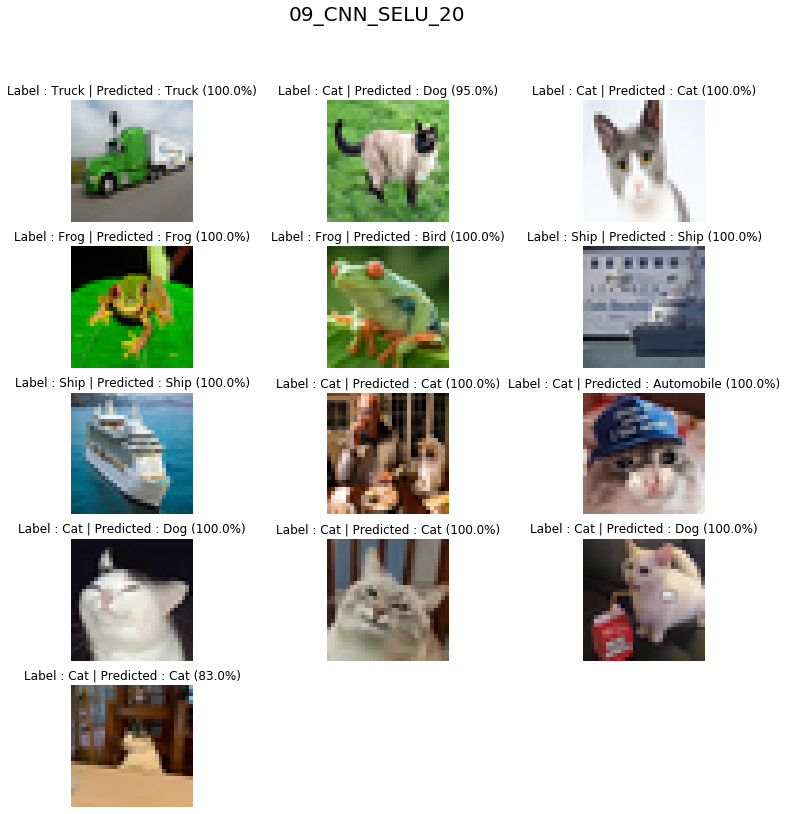

In [8]:
Plotter(images, load_model("09_CNN_SELU_20.h5"), "09_CNN_SELU_20")()